In [58]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind

# import csv data files
education_file = "Resources/education.csv"
childmarriage_file = "Resources/childmarriage.csv"


# create dataframes for each
education_file_df = pd.read_csv(education_file, encoding="ISO-8859-1")
childmarriage_file_df = pd.read_csv(childmarriage_file, encoding="ISO-8859-1")
countries_df = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')

#education_file_df.head()
#childmarriage_file_df.head()
#countries_df[0]

In [2]:
filtered_education = education_file_df.filter(["Indicator"== "Youth literacy rate, population 15-24 years, both sexes (%)",
                                              "LOCATION", "Country","TIME", "Value"])
#filtered_education.head()                       

In [3]:
#childmarriage_file_df.head()
clean_childmarriage=childmarriage_file_df[['Geographic Area','Indicator','Sex','Time Period','Current Age',
                           'Observation Value','Unit of Measure','The period of time for which data are provided']]
clean_childmarriage = clean_childmarriage.rename(columns={"Geographic Area":"Country"})
#clean_childmarriage.head()

In [4]:
#countries_df[0]
clean_countries = countries_df[0].rename(columns={"name":"Country","country":"Abbr"})
#clean_countries.head()

In [5]:
# make country lowercase
clean_childmarriage["Country"] = clean_childmarriage["Country"].map(lambda z: z.lower())
clean_countries["Country"] = clean_countries["Country"].map(lambda z: z.lower())
filtered_education["Country"] = filtered_education["Country"].map(lambda z: z.lower())

In [6]:
childmarriage_final = pd.merge(clean_childmarriage, clean_countries, how="left", on="Country")
childmarriage_final = childmarriage_final.drop(columns=["The period of time for which data are provided","Abbr"])
childmarriage_final
childmarriage_final.head()

,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,latitude,longitude
0,botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,-22.328474,24.684866
1,uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,41.377491,64.585262
2,philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,12.879721,121.774017
3,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,0.8,%,-30.559482,22.937506
4,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,-30.559482,22.937506


In [7]:
education_final = pd.merge(filtered_education, clean_countries, how="left", on="Country")
education_final = education_final.drop(columns=["LOCATION","Abbr"])
education_final.head()

,Country,TIME,Value,latitude,longitude
0,morocco,1982,0.53256,31.791702,-7.09262
1,morocco,1994,0.64434,31.791702,-7.09262
2,morocco,2004,0.74865,31.791702,-7.09262
3,morocco,2008,0.81461,31.791702,-7.09262
4,morocco,2009,0.83185,31.791702,-7.09262


In [52]:
# Question 1: Is child marriage decreasing over time? (line graph and bar graph)

In [51]:
# Figure out the minimum and maximum years in the child marriage data frame
print(childmarriage_final["Time Period"].max())
print(childmarriage_final["Time Period"].min())

# Create bins in which to place time periods based upon values
bins = [1998, 2003, 2008, 2013, 2018]

# Create labels for these bins
year_ranges = ["1998-2003", "2003-2008", "2008-2013", "2013-2018"]

# Slice the data and place it into bins
pd.cut(childmarriage_final["Time Period"], bins, labels=year_ranges).head()

# Place the data series into a new column inside of the DataFrame
childmarriage_final["Year Range"] = pd.cut(childmarriage_final["Time Period"], bins, labels=year_ranges, include_lowest=True)
childmarriage_final.head()

# Create a GroupBy object based upon "View Group"
childmarriage_grouped = childmarriage_final.groupby("Year Range")

# Get the average of each column within the GroupBy object
childmarriage_grouped_df = childmarriage_grouped["Observation Value"].median()
childmarriage_grouped_df

2018
1988


Year Range
1998-2003    1.85
2003-2008    5.50
2008-2013    5.60
2013-2018    7.15
Name: Observation Value, dtype: float64

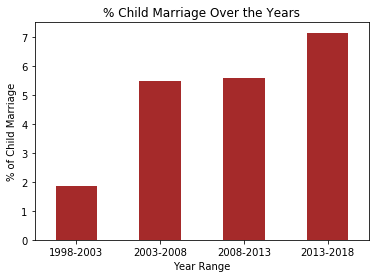

<Figure size 432x288 with 0 Axes>

In [48]:
# Create a line chart based off of the time and the observation values
childmarriage_barchart = childmarriage_grouped_df.plot(kind='bar', color='brown', rot=0)

# Set the xlabel and ylabel using class methods
childmarriage_barchart.set_xlabel("Year Range")
childmarriage_barchart.set_ylabel("% of Child Marriage")
plt.title("% Child Marriage Over the Years")

plt.show()
plt.tight_layout()

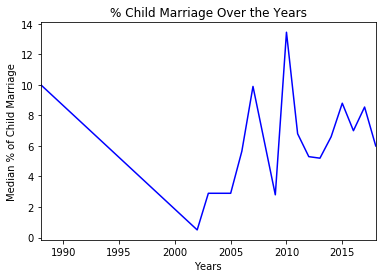

<Figure size 432x288 with 0 Axes>

In [50]:
# Create a line graph based off of the year ranges and the observation values

# Create a GroupBy object based upon "Time Period"
cm2 = childmarriage_final.groupby("Time Period")

# Get the average of each column within the GroupBy object
cm2_df = cm2["Observation Value"].median()
cm2_df

childmarriage_linechart = cm2_df.plot(kind='line', color='blue')

# Set the xlabel and ylabel using class methods
childmarriage_linechart.set_xlabel("Years")
childmarriage_linechart.set_ylabel("Median % of Child Marriage")
plt.title("% Child Marriage Over the Years")

plt.show()
plt.tight_layout()

Ttest_indResult(statistic=-2704.2423148013004, pvalue=0.0)

In [ ]:
# Question 2: What is the correlation of literacy rate and child marriage? (scatter plot with regression line and boxplot) 

In [ ]:
# Question 3: What is the geographical impact on child marriage and education? (heat map one for education and one for child marriage)

In [ ]:
# Question 4: Is one gender more susceptible to child marriage than the other? (pie graph)

In [ ]:
# Conclusion: our null hypothesis is that education has no impact on child marriage rates.